In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D

from pandas.plotting import scatter_matrix
import math

# Get the Data

In [4]:
maneuvers = pd.read_csv("maneuvers_cntrl.csv")
#maneuvers.head()

In [5]:
maneuvers.describe()

,x,y,z,dx,dy,dz,dv_st
count,1000.000000,1.000000e+03,1000.000000,1.000000e+03,1000.000000,1.000000e+03,1000.000000
mean,-0.991665,4.407464e-07,0.000898,-7.626805e-07,0.009930,-1.398749e-07,0.000004
std,0.000029,2.866435e-05,0.000029,2.819187e-05,0.000029,2.865990e-05,0.000114
min,-0.991715,-4.994556e-05,0.000849,-4.983229e-05,0.009881,-4.979573e-05,-0.000243
25%,-0.991693,-2.358713e-05,0.000873,-2.473676e-05,0.009905,-2.454648e-05,-0.000090
50%,-0.991664,9.902027e-07,0.000899,3.466198e-07,0.009930,3.241270e-08,-0.000003
75%,-0.991640,2.500838e-05,0.000924,2.383133e-05,0.009953,2.485420e-05,0.000104
max,-0.991615,4.990637e-05,0.000948,4.996274e-05,0.009980,4.980988e-05,0.000254


Notice that dv_vel varies in the range -2e-7 to 1e-7, while dv_st varies in the range -7e-9 to 4e-9, so the MOST COSTLY maneuvers are much larger using CORRECTION_VEL method than using CORRECTION_ST !!

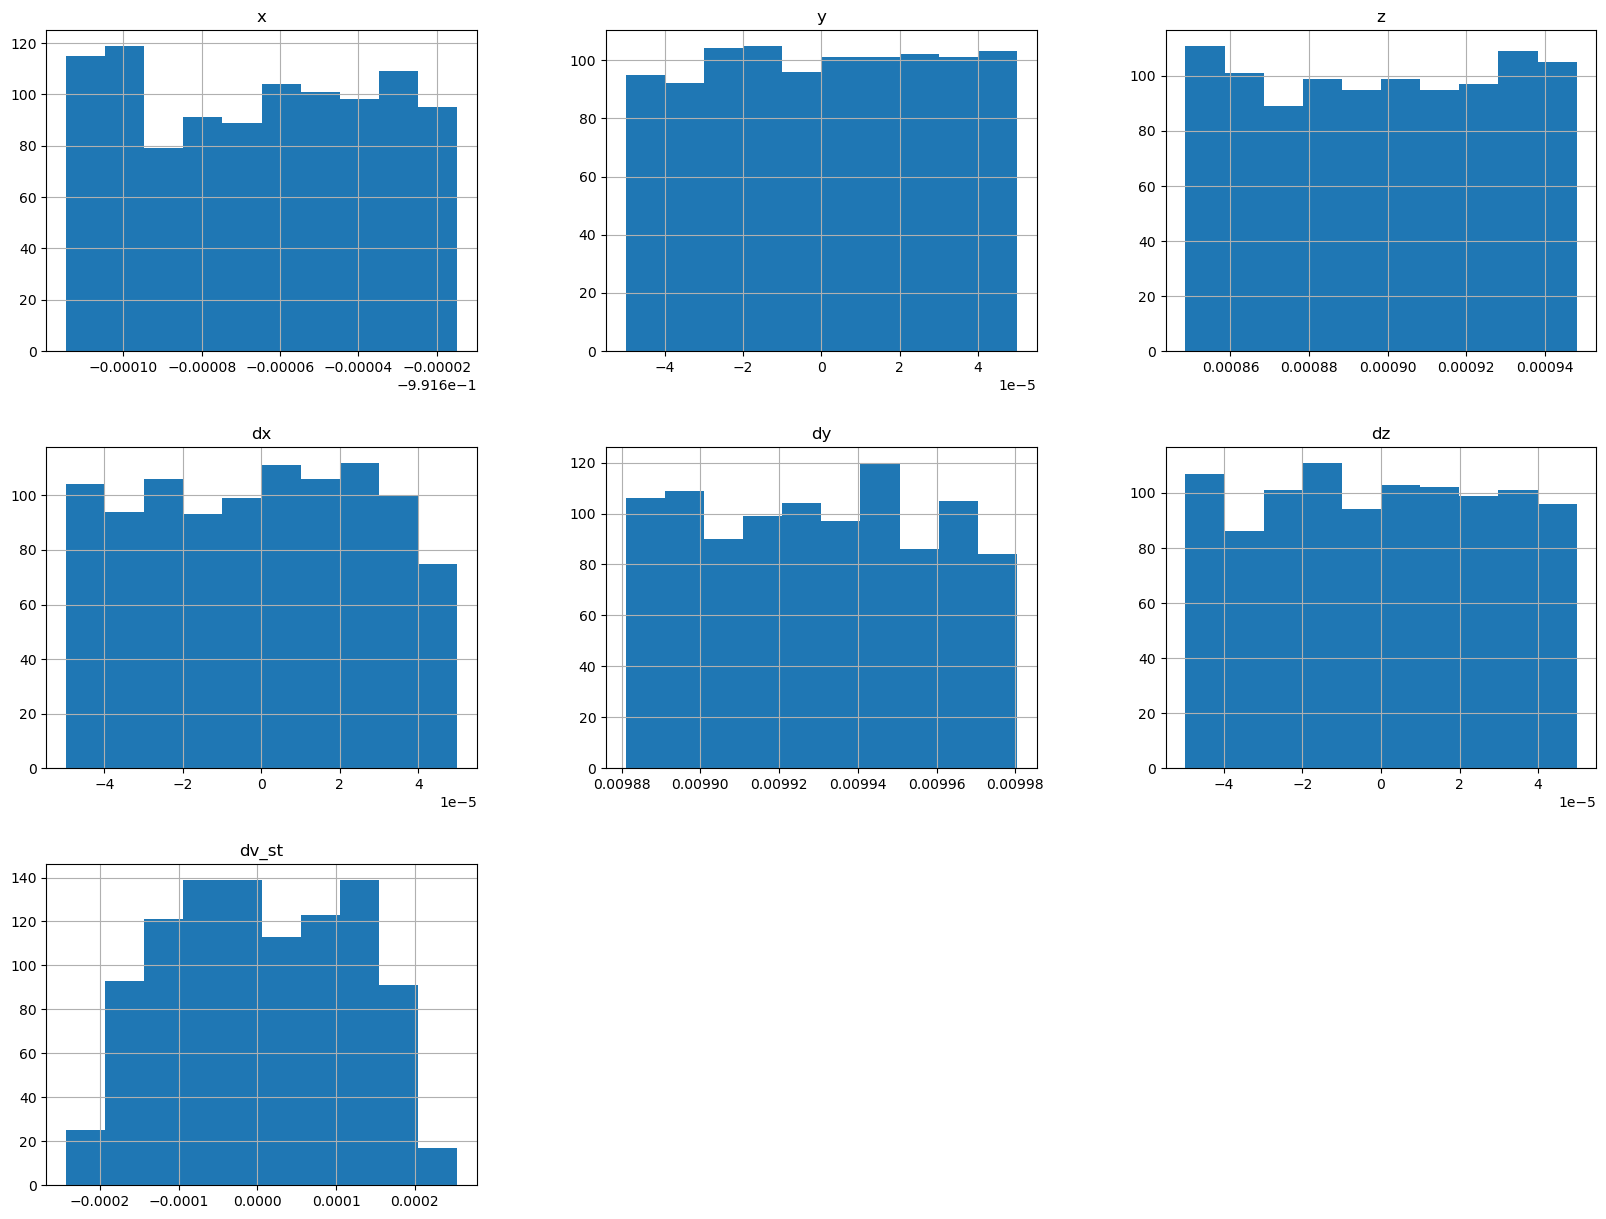

In [6]:
maneuvers.hist(figsize=(20,15))
plt.show()

## Visualizing Data

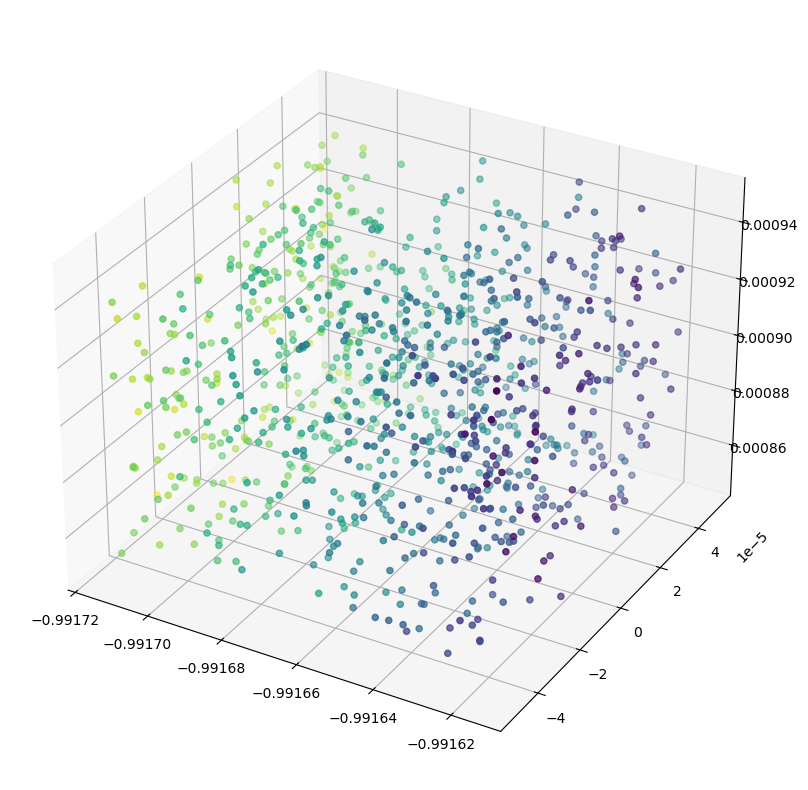

In [7]:
# Visualize shadowing orbit in position space, i.e. the points where correction
# maneuvers are performed.

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.scatter3D(maneuvers['x'], maneuvers['y'], maneuvers['z'], c=maneuvers['dv_st'])
plt.show()

Try adding new attribute "angle" = angle in the periodic orbit, which is essentially time/period.

In [8]:
#maneuvers["angle"]=maneuvers["t"].apply(lambda x: math.fmod(x, 0.3059226605957322E+01))
#maneuvers = maneuvers.drop(["t"], axis=1)
corr_matrix = maneuvers.corr()
corr_matrix["dv_st"].sort_values(ascending=False)

dv_st    1.000000
y        0.066029
dz       0.023715
z       -0.073499
dy      -0.201657
dx      -0.216155
x       -0.963699
Name: dv_st, dtype: float64

array([[<Axes: xlabel='x', ylabel='x'>, <Axes: xlabel='y', ylabel='x'>,
        <Axes: xlabel='dx', ylabel='x'>, <Axes: xlabel='dy', ylabel='x'>,
        <Axes: xlabel='dv_st', ylabel='x'>],
       [<Axes: xlabel='x', ylabel='y'>, <Axes: xlabel='y', ylabel='y'>,
        <Axes: xlabel='dx', ylabel='y'>, <Axes: xlabel='dy', ylabel='y'>,
        <Axes: xlabel='dv_st', ylabel='y'>],
       [<Axes: xlabel='x', ylabel='dx'>, <Axes: xlabel='y', ylabel='dx'>,
        <Axes: xlabel='dx', ylabel='dx'>,
        <Axes: xlabel='dy', ylabel='dx'>,
        <Axes: xlabel='dv_st', ylabel='dx'>],
       [<Axes: xlabel='x', ylabel='dy'>, <Axes: xlabel='y', ylabel='dy'>,
        <Axes: xlabel='dx', ylabel='dy'>,
        <Axes: xlabel='dy', ylabel='dy'>,
        <Axes: xlabel='dv_st', ylabel='dy'>],
       [<Axes: xlabel='x', ylabel='dv_st'>,
        <Axes: xlabel='y', ylabel='dv_st'>,
        <Axes: xlabel='dx', ylabel='dv_st'>,
        <Axes: xlabel='dy', ylabel='dv_st'>,
        <Axes: xlabel='dv_st', y

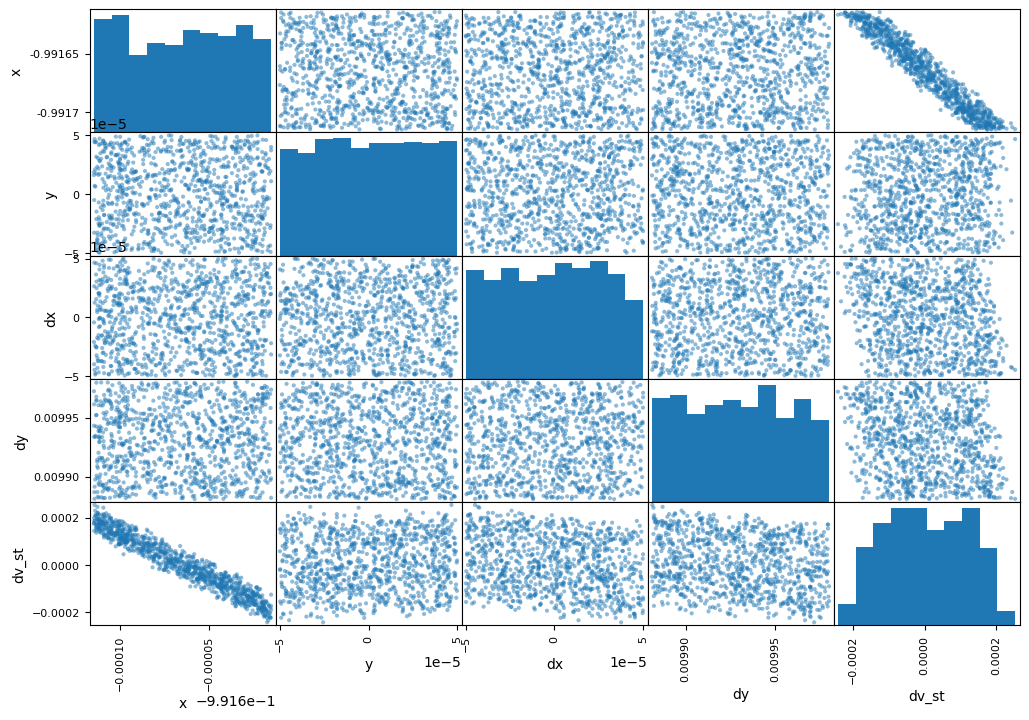

In [9]:
#attributes = ["angle", "x", "dx", "dv_st"]
attributes = ["x", "y", "dx", "dy", "dv_st"]
scatter_matrix(maneuvers[attributes], figsize=(12, 8))

dv_st is either positively or negatively correlated to state variables (x,y,z,dx,dy,dz) !!

# Prepare the Data for Machine Learning Algorithms

## Create a Train/Test Set

In [10]:
# Let's separate the predictors and the labels

# Drop dx and dz features, since they are almost proportional to y
#maneuvers_predictors = maneuvers.drop(["dx", "dz", "dv_st"], axis=1)

maneuvers_predictors = maneuvers.drop("dv_st", axis=1)
maneuvers_labels = maneuvers[["dv_st"]].copy()
maneuvers_predictors.head()
#maneuvers_labels.head()

,x,y,z,dx,dy,dz
0,-0.991693,0.000035,0.000850,-0.000038,0.009977,-0.000043
1,-0.991647,-0.000034,0.000922,-0.000005,0.009897,0.000007
2,-0.991636,-0.000038,0.000866,-0.000005,0.009935,0.000006
3,-0.991708,0.000041,0.000898,0.000035,0.009952,-0.000015
4,-0.991704,0.000040,0.000861,-0.000008,0.009978,-0.000043


## Create Train/Test/Validation Sets

In [11]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
maneuvers_predictors, maneuvers_labels, test_size=0.2, random_state=1)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)
print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)
X_train.head()

(600, 6)
(200, 6)
(200, 6)


,x,y,z,dx,dy,dz
855,-0.991656,-0.000016,0.000927,0.000034,0.009949,-0.000044
135,-0.991671,0.000003,0.000887,-0.000002,0.009912,0.000049
63,-0.991660,-0.000011,0.000917,-0.000008,0.009900,-0.000003
288,-0.991615,0.000011,0.000858,-0.000032,0.009899,-0.000008
361,-0.991700,0.000039,0.000851,0.000039,0.009932,-0.000007


In [12]:
# Scale all the features. This transforms data type from dataframe to numpy array.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train.values)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)
X_train_scaled[:5]

/home/pau/anaconda3/envs/halo/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/home/pau/anaconda3/envs/halo/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


array([[0.58870325, 0.34246792, 0.79011044, 0.8400705 , 0.68654396,
        0.05066885],
       [0.43395299, 0.52896233, 0.38497704, 0.48230555, 0.30815041,
        0.98833984],
       [0.54465293, 0.39190177, 0.68336079, 0.41412439, 0.18864374,
        0.46518497],
       [0.99997072, 0.6085426 , 0.09640511, 0.18153831, 0.17613107,
        0.41946985],
       [0.15025702, 0.89087582, 0.02813874, 0.89484829, 0.51710924,
        0.42659985]])

In [13]:
# Try PCA of data
from sklearn.decomposition import PCA
pca_pred = PCA(n_components=2, whiten=True)   # PCA of predictors
principalComponents_pred = pca_pred.fit_transform(X_train_scaled)
print('Explained variability per principal component: {}'.format(pca_pred.explained_variance_ratio_))

# X_train_scaled = pca_pred.transform(X_train_scaled)
# X_valid_scaled = pca_pred.transform(X_valid_scaled)
# X_test_scaled = pca_pred.transform(X_test_scaled)
# X_train_scaled[:5]

Explained variability per principal component: [0.19043333 0.17583066]


In [14]:
# Scale target variable dv_st as well.
# Rationale: dv_st takes very small values (10^{-8}), 
# so MSE may be tiny and not computed properly. Also, NN may converge faster?

scaler_target = MinMaxScaler()
y_train_scaled = scaler_target.fit_transform(y_train.values)
y_valid_scaled = scaler_target.transform(y_valid)
y_test_scaled = scaler_target.transform(y_test)

/home/pau/anaconda3/envs/halo/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/home/pau/anaconda3/envs/halo/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


<Figure size 640x480 with 0 Axes>

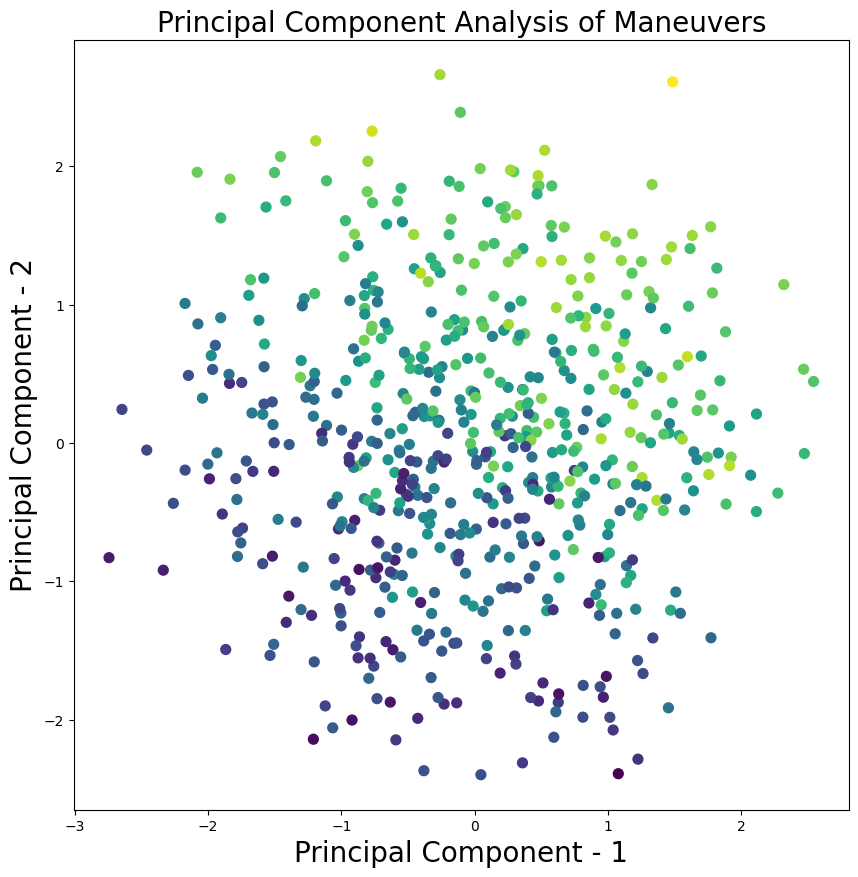

In [15]:
# Plot results of PCA
plt.figure()
plt.figure(figsize=(10,10))
#plt.xticks(fontsize=12)
#plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Maneuvers",fontsize=20)
plt.scatter(principalComponents_pred[:, 0], principalComponents_pred[:, 1], c=y_train_scaled, s = 50)

From the above picture, it is seems that (PC1, PC2) only do not allow to distinguish dv. 

In [16]:
import joblib
joblib.dump(scaler, 'scaler_supervised.gz')
joblib.dump(scaler_target, 'scaler_target_supervised.gz')

['scaler_target_supervised.gz']

# Select and Train a Model

## Training and Evaluating on the Training Set

In [17]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train_scaled)
lin_reg.coef_

array([[-0.75804329,  0.02778844, -0.05736519, -0.15806126, -0.1365797 ,
        -0.00793129]])

In [18]:
# Let's measure this regression model's RMSE on the whole training set
from sklearn.metrics import mean_squared_error
maneuvers_predictions = lin_reg.predict(X_train_scaled)
lin_mse = mean_squared_error(y_train_scaled, maneuvers_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

np.float64(0.0004194386607561988)

Clearly not a great score: the SD(dv_st) value is 8.e-7, so a typical prediction error of 6.6.e-7 is not great.

In [19]:
# Let’s train a DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train_scaled, y_train_scaled)

maneuvers_predictions = tree_reg.predict(X_train_scaled)
tree_mse = mean_squared_error(y_train_scaled, maneuvers_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

np.float64(0.0)

NOW THIS IS MUCH BETTER!!

In [20]:
#Let's try it out on 5 instances from the test set
some_data = X_test_scaled[10:20]
some_labels = y_test_scaled[10:20]
print("Predictions:", list(tree_reg.predict(some_data)))
print("Labels:", list(some_labels))

Predictions: [np.float64(0.8436497431313534), np.float64(0.15549611445996814), np.float64(0.19778717956360442), np.float64(0.7942763143409561), np.float64(0.6852916615036501), np.float64(0.8436497431313534), np.float64(0.17973928676134465), np.float64(0.31721880068763), np.float64(0.19778717956360442), np.float64(0.2858982335361051)]
Labels: [array([0.98361649]), array([0.11802347]), array([0.29574875]), array([0.76871353]), array([0.73533744]), array([0.97619445]), array([0.132812]), array([0.3666486]), array([0.2600443]), array([0.32937317])]


In [21]:
# Let’s train a RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(X_train_scaled, y_train_scaled)

maneuvers_predictions = forest_reg.predict(X_train_scaled)
forest_mse = mean_squared_error(y_train_scaled, maneuvers_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

/home/pau/anaconda3/envs/halo/lib/python3.13/site-packages/sklearn/base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


np.float64(0.009823434978600996)

## Polynomial Regression

In [22]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
maneuvers_pred_poly = poly_features.fit_transform(X_train_scaled)
#print(X_train_scaled.head())
print(maneuvers_pred_poly[0])
#poly_features.get_feature_names_out(['x','y','z','dy'])

[0.58870325 0.34246792 0.79011044 0.8400705  0.68654396 0.05066885
 0.34657151 0.20161198 0.46514058 0.49455223 0.40417066 0.02982891
 0.11728428 0.27058748 0.2876972  0.23511928 0.01735245 0.6242745
 0.66374847 0.54244555 0.04003398 0.70571844 0.57674533 0.0425654
 0.47134261 0.03478639 0.00256733]


In [23]:
my_lin_reg = LinearRegression()
my_lin_reg.fit(maneuvers_pred_poly, y_train_scaled)
print(my_lin_reg.coef_)
maneuvers_predictions = my_lin_reg.predict(maneuvers_pred_poly)
lin_mse = mean_squared_error(y_train_scaled, maneuvers_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

[[-7.61533900e-01  3.11538565e-02 -5.44677586e-02 -1.58537654e-01
  -1.35725002e-01 -7.24258146e-03  2.90255231e-03  2.00639913e-04
   1.25080854e-03  2.21651533e-04 -4.16559271e-04  1.61132087e-05
  -3.23078258e-03  4.67108230e-05  5.06591693e-04 -9.45390323e-04
   2.46904997e-05 -3.10953684e-03  4.46197517e-05 -7.98241692e-05
  -8.81018508e-04 -7.37142985e-05  2.74415988e-04  8.23960662e-06
  -2.54803779e-04 -1.36094579e-05 -2.91322325e-04]]


np.float64(2.2118694100118023e-06)

## SVM Regression

In [24]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="poly", degree=2)
svm_poly_reg.fit(X_train_scaled, y_train_scaled)
maneuvers_predictions = svm_poly_reg.predict(X_train_scaled)
svm_mse = mean_squared_error(y_train_scaled, maneuvers_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

/home/pau/anaconda3/envs/halo/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


np.float64(0.05165925627385286)

## Cross-validation

Scikit-Learn’s K-fold cross-validation feature. The following code randomly splits the training set into 10 distinct subsets called folds, then it trains and evaluates the Random Forest model 10 times, picking a different fold for evaluation every time and training on the other 9 folds. The result is an array containing the 10 evaluation scores.

In [25]:
from sklearn.model_selection import cross_val_score
#tree_reg = DecisionTreeRegressor()
#forest_reg = RandomForestRegressor()
lin_reg = LinearRegression()
scores = cross_val_score(lin_reg, maneuvers_pred_poly, y_train_scaled,
scoring="neg_root_mean_squared_error", cv=5)
poly_rmse_scores = -scores

In [26]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(poly_rmse_scores)

Scores: [2.19050173e-06 2.44333065e-06 2.64661009e-06 2.12760755e-06
 2.48275131e-06]
Mean: 2.3781602662714076e-06
Standard deviation: 1.9248073170171493e-07


## Evaluate Model on Test Set

In [27]:
maneuvers_pred_poly = poly_features.fit_transform(X_test_scaled)
maneuvers_predictions = my_lin_reg.predict(maneuvers_pred_poly)
lin_mse = mean_squared_error(y_test_scaled, maneuvers_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

np.float64(2.332096375626722e-06)

## Persist model

In [28]:
# Persist the model for future use (see correction_module.py) without having to retrain.
# Here you can replace pickle with joblib or cloudpickle
from pickle import dump
with open("model_supervised.pkl", "wb") as f:
    dump(my_lin_reg, f, protocol=5)